<a href="https://colab.research.google.com/github/Prakashbhanu195/AQI/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        City        Date     NO    NO2    NOx     CO    SO2      O3    O3.1  \
0  Ahmedabad   2/14/2014   0.92  18.22  17.15   0.92  27.64  133.36  133.36   
1  Ahmedabad  01-02-2015   0.97  15.69  16.46   0.97  24.55   34.06   34.06   
2  Ahmedabad  01-03-2015  17.40  19.30  29.70  17.40  29.07   30.70   30.70   
3  Ahmedabad  01-04-2015   1.70  18.48  17.97   1.70  18.59   36.08   36.08   
4  Ahmedabad  01-05-2015  22.10  21.42  37.76  22.10  39.33   39.31   39.31   

   Toluene  Xylene  AQI AQI_BUCKET  
0     0.02    0.00  NaN        NaN  
1     5.50    3.77  NaN        NaN  
2    16.40    2.25  NaN        NaN  
3    10.14    1.00  NaN        NaN  
4    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        451 non-null    object 
 1   Date        451 non-null    object 
 2   NO          305 non-null    f

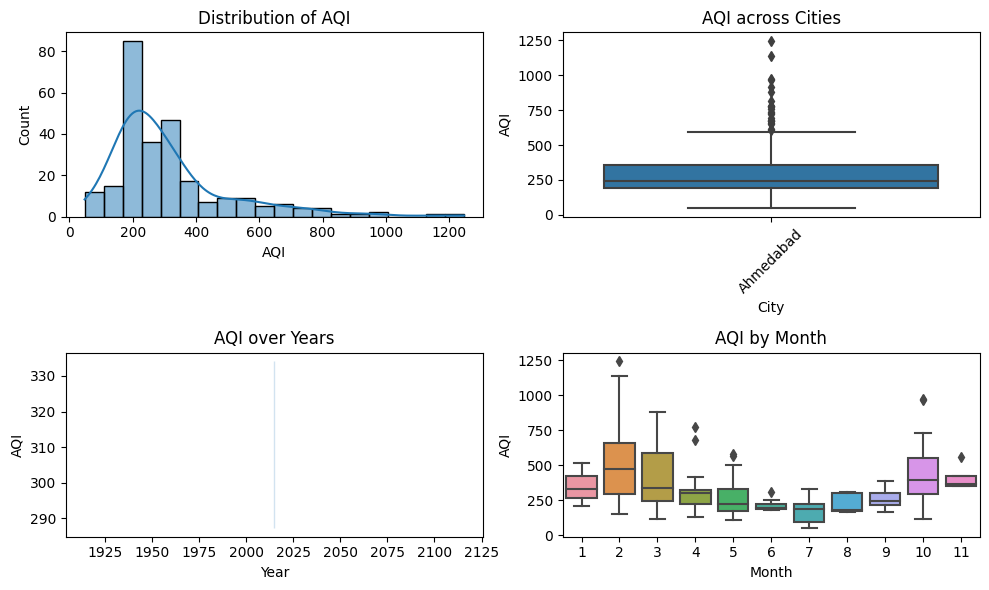

Mean Squared Error: 4399.143962264151


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/AQI chatgpt.csv")  # Replace with your dataset filename

# Explore the dataset
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime
data = data.dropna()  # Remove rows with missing values

# Data Visualization
plt.figure(figsize=(10, 6))

# Distribution of AQI
plt.subplot(2, 2, 1)
sns.histplot(data['AQI'], bins=20, kde=True)
plt.title('Distribution of AQI')

# AQI vs. Cities
plt.subplot(2, 2, 2)
sns.boxplot(x='City', y='AQI', data=data)
plt.xticks(rotation=45)
plt.title('AQI across Cities')

# AQI vs. Year
data['Year'] = data['Date'].dt.year
plt.subplot(2, 2, 3)
sns.lineplot(x='Year', y='AQI', data=data)
plt.title('AQI over Years')

# AQI vs. Month
data['Month'] = data['Date'].dt.month
plt.subplot(2, 2, 4)
sns.boxplot(x='Month', y='AQI', data=data)
plt.title('AQI by Month')

plt.tight_layout()
plt.show()

# Convert categorical city names to numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['City'] = le.fit_transform(data['City'])

# Splitting data into features and target
X = data.drop(['AQI', 'AQI_BUCKET', 'Date'], axis=1)
y = data['AQI']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict AQI on the test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
